# ****Health Care Prediction for Diabetic Patients - Case Study****

## **Context**

#### This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## **Problem Statement**

#### Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

## **Dataset Description**

#### The dataset includes various medical predictor variables and one target variable, "Outcome." The predictor variables encompass essential health metrics, such as the number of pregnancies, plasma glucose concentration, diastolic blood pressure, triceps skinfold thickness, insulin levels, body mass index (BMI), diabetes pedigree function, and age.

### **Predictor Values**

1. **Pregnancies:**
   - Number of times pregnant

2. **Glucose:**
   - Plasma glucose concentration at 2 hours in an oral glucose tolerance test

3. **BloodPressure:**
   - Diastolic blood pressure (mm Hg)

4. **SkinThickness:**
   - Triceps skinfold thickness (mm)

5. **Insulin:**
   - 2-Hour serum insulin (mu U/ml)

6. **BMI:**
   - Body mass index (weight in kg/(height in m)^2)

7. **DiabetesPedigreeFunction:**
   - Diabetes pedigree function

8. **Age:**
   - Age in years

### **Target Variable**

- **Outcome:**
   - Class variable (0 or 1)
   - 268 instances are labeled as 1 (indicating diabetes), while others are labeled as 0.

This dataset provides a valuable opportunity to develop a predictive model for diabetes based on demographic and health-related features.

## Loading the required Library Packages:

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix,precision_score,recall_score,roc_curve,auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

## Loading and exploring the Health Care **Dataset**

In [22]:
from google.colab import files
uploaded = files.upload()

Saving health care diabetes.csv to health care diabetes (2).csv


In [29]:
df = pd.read_csv("health care diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [30]:
# Exploring the header of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
# Checking the number of rows and columns of the dataset
df.shape

(768, 9)

In [37]:
# Checking for the presence of null-values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [33]:
# Dataset Information Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [34]:
# Summary Statistics for the Diabetes Dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##  Data Preprocessing: Treating the Missing Values

### In this datasets 0 represents the null values, and hence we will replace 0 by mean of their feature (variable) columns.

In [40]:
#Identifying the mean of the features
print(df['Glucose'].mean())
print(df['BloodPressure'].mean())
print(df['SkinThickness'].mean())
print(df['Insulin'].mean())

120.89453125
69.10546875
20.536458333333332
79.79947916666667


In [41]:
# Finding the number of rows which has the null values
print('Glucose-',len(df['Glucose'][df['Glucose']==0]))
print('BloodPressure-',len(df['BloodPressure'][df['BloodPressure']==0]))
print('SkinThickness-',len(df['SkinThickness'][df['SkinThickness']==0]))
print('Insulin-',len(df['Insulin'][df['Insulin']==0]))

Glucose- 5
BloodPressure- 35
SkinThickness- 227
Insulin- 374


In [44]:
# Finding the null value percentage
selected_columns = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin']
null_percentage = (df[selected_columns] == 0).mean() * 100

# Displaying the null value percentage for each selected column
print("Percentage of Null Values for Each Column:")
print(null_percentage)

Percentage of Null Values for Each Column:
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
dtype: float64


## Inferences from Null Value Percentage Analysis

The analysis of null value percentages in the dataset reveals the following insights:

1. **Glucose:**
   - Approximately 0.65% of the data points in the "Glucose" column are represented as null values.

2. **Blood Pressure:**
   - The "Blood Pressure" column has a null value percentage of approximately 4.56%.

3. **Skin Thickness:**
   - A significant portion of the "Skin Thickness" column, around 29.56%, contains null values.

4. **Insulin:**
   - The "Insulin" column exhibits a higher null value percentage, with approximately 48.70% of the data points being null.

These findings suggest that imputation or other strategies may be necessary for columns with substantial null values, such as "Skin Thickness" and "Insulin," to ensure the integrity of the dataset for subsequent analyses or modeling.

In [47]:
# Replacing the null values with the mean
df['Glucose']=df['Glucose'].replace([0],[df['Glucose'].mean()])
df['BloodPressure']=data['BloodPressure'].replace([0],[df['BloodPressure'].mean()])
df['SkinThickness']=df['SkinThickness'].replace([0],[df['SkinThickness'].mean()])
df['Insulin']=df['Insulin'].replace([0],[df['Insulin'].mean()])

In [48]:
#Checking the null value percentage of the treated columns
null_percentage_treated = (df[selected_columns] == 0).mean() * 100

# Displaying the null value percentage for each selected column
print("Percentage of Null Values for Each Column after the null value treatment:")
print(null_percentage_treated)

Percentage of Null Values for Each Column after the null value treatment:
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
dtype: float64


## Inference from Null Value Treatment

After addressing null values in the dataset, it is observed that all selected columns ("Glucose," "Blood Pressure," "Skin Thickness," and "Insulin") no longer contain any null values. The null value treatment has been successful, resulting in a clean dataset with 0% null values in these specific columns.
*italicized text*

## Detecting Outliers and Treatment

In [50]:
columns = df[selected_columns]
columns

,Glucose,BloodPressure,SkinThickness,Insulin
0,148.0,72.0,35.000000,79.799479
1,85.0,66.0,29.000000,79.799479
2,183.0,64.0,20.536458,79.799479
3,89.0,66.0,23.000000,94.000000
4,137.0,40.0,35.000000,168.000000
...,...,...,...,...
763,101.0,76.0,48.000000,180.000000
764,122.0,70.0,27.000000,79.799479
765,121.0,72.0,23.000000,112.000000
766,126.0,60.0,20.536458,79.799479


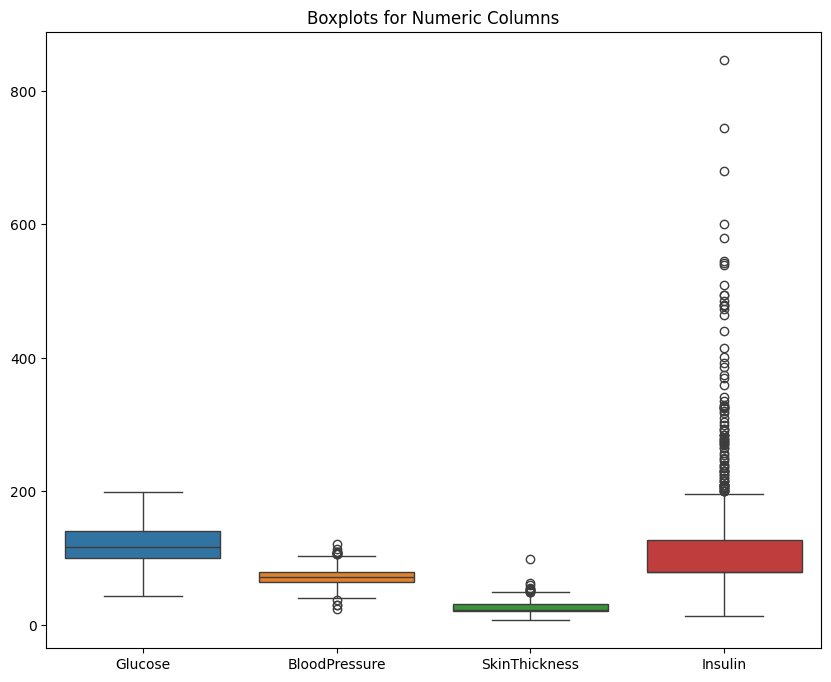

In [56]:
# Display boxplots for numeric columns to visualize outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=columns)
plt.title("Boxplots for Numeric Columns")
plt.show()

In [57]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [58]:
# Finding the Outlier Count in the selected Columns:
def find_outliers_iqr(data, column_name):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Count the number of outliers
    count_outliers = len(outliers)

    return count_outliers

# Calculate and print the number of outliers for each column of interest
for column_name in selected_columns:
    outlier_count = find_outliers_iqr(df, column_name)
    print(f"Number of outliers in the '{column_name}' column: {outlier_count}")

Number of outliers in the 'Glucose' column: 0
Number of outliers in the 'BloodPressure' column: 14
Number of outliers in the 'SkinThickness' column: 12
Number of outliers in the 'Insulin' column: 89


### Boxplot Analysis for Numerical Columns

The boxplot illustrates the distribution of four numerical columns: Glucose, BloodPressure, Skin Thickness, and Insulin. The following inferences can be drawn:

#### Glucose
- Median glucose level: ~200 mg/dL
- IQR is large, indicating considerable variability in glucose levels.
- There are no outliers

#### Blood Pressure
- Median blood pressure: 72 mmHg (within the normal range).
- IQR is relatively small, suggesting more consistent blood pressure levels.
- Few outliers, none extremely high or low.

#### Skin Thickness
- Median skin thickness: ~25 mm
- IQR is small, indicating less considerable variability in skin thickness.
- Few outliers, none extremely high.

#### Insulin
- Median insulin level: ~79 mIU/L
- IQR is large, indicating considerable variability in insulin levels.
- More outliers, many are extremely high.

#### Overall Observations
- All columns exhibit a wide range of values, with some outliers. Insulin column has many outliers
- Median values for all columns, except the insulin column fall within the normal range.

#### Additional Inferences
- Glucose levels show more variability than blood pressure levels.
- More outliers in the insulin columns compared to blood pressure and skin thickness.

#### Possible Interpretations
- Variability in glucose levels may be influenced by factors like diet, exercise, and stress.
- Outliers in the Insulin column may also be associated with underlying medical conditions or physiological factors. Elevated insulin levels could be indicative of conditions such as insulin resistance or diabetes. Additionally, factors such as dietary habits, genetic predisposition, or specific medical treatments may contribute to higher insulin levels. Further investigation and domain expertise are necessary to understand the potential health implications of these outliers in the Insulin column.

It is essential to note that these inferences are based on a single boxplot, and further information is needed to draw definitive conclusions.


## Outlier Treatment

In [64]:
sorted(df)
Q1=df.quantile(0.20)
Q3=df.quantile(0.80)
IQR=Q3-Q1
print(IQR)

Pregnancies                  6.000000
Glucose                     52.000000
BloodPressure               20.000000
SkinThickness               14.463542
Insulin                     70.200521
BMI                         11.900000
DiabetesPedigreeFunction     0.467600
Age                         19.600000
Outcome                      1.000000
dtype: float64


In [65]:
df_cleared_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_cleared_iqr
print(df_cleared_iqr.shape)
print(df.shape)

(678, 9)
(768, 9)


In [66]:
df_cleared_iqr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


## Inferences from Outlier Removal using IQR Method

1. **Data Size Reduction:**
   - After removing outliers using the interquartile range (IQR) method, the dataset has been reduced from 768 to 678 rows.

2. **Outliers Identified:**
   - Outliers were detected and removed across various columns, particularly impacting features like Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, and Age.

3. **Increased Data Robustness:**
   - The IQR-based outlier removal contributes to a more robust dataset, potentially improving the reliability of statistical analyses and modeling.

4. **Preserved Features:**
   - The operation was applied to 9 columns, including predictors like Glucose and Skin Thickness, as well as the target variable Outcome.

5. **Consideration for Domain Knowledge:**
   - The decision to remove outliers should be made with consideration for domain knowledge, as outliers may contain valuable information or indicate specific health conditions.

**Final Dataset Statistics:**
- Dataset size after outlier removal: 678 rows.
- Original dataset size: 768 rows.


In [70]:
col = df_cleared_iqr[["Glucose" , "BloodPressure" , "SkinThickness" , "Insulin"]]
col

,Glucose,BloodPressure,SkinThickness,Insulin
0,148.0,72.0,35.000000,79.799479
1,85.0,66.0,29.000000,79.799479
2,183.0,64.0,20.536458,79.799479
3,89.0,66.0,23.000000,94.000000
5,116.0,74.0,20.536458,79.799479
...,...,...,...,...
763,101.0,76.0,48.000000,180.000000
764,122.0,70.0,27.000000,79.799479
765,121.0,72.0,23.000000,112.000000
766,126.0,60.0,20.536458,79.799479


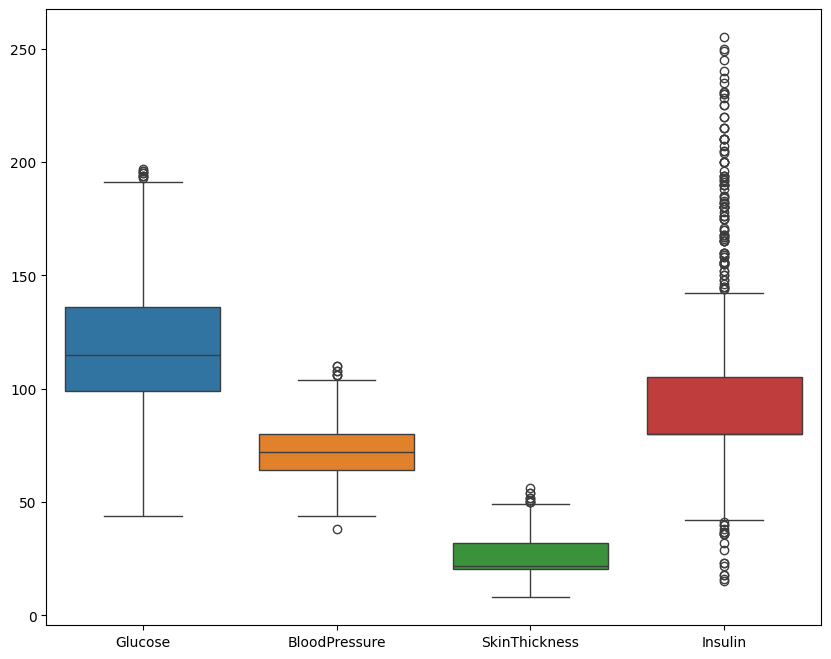

In [72]:
# Checking the outliers after treatment using box plot
plt.figure(figsize=(10, 8))
sns.boxplot(data=col)
plt.show()

#### It can be observed that the outliers have been significantly reduced

---

### Feature Scaling

In [78]:
# Scale the features in df_cleared_iqr
scaler = StandardScaler()
X = df_cleared_iqr.drop("Outcome", axis=1)  # Assuming 'Outcome' is the target
y = df_cleared_iqr["Outcome"]

X_scaled = scaler.fit_transform(X)

### Train-Test Split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

----

## Model Selection and Initial Training



1. Logistic Regression
2. Random Forest Classifier
3. Support Vector Classifier (SVC)
4. K-Nearest Neighbors (KNN)

### 1. Logistic Regression



How it Works: Logistic Regression is a linear model used for binary classification. It estimates the probability that a given input point belongs to a certain class (0 or 1) by applying the logistic function to a linear combination of input features. The output is a probability score, which is then mapped to class labels.

Why to Choose It: Logistic Regression is simple, interpretable, and performs well on linearly separable data. It’s a good baseline model to start with for binary classification tasks, and it’s computationally efficient, which is beneficial for quicker training and evaluation.

In [90]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", accuracy_log)

Logistic Regression Accuracy: 0.8


### 2. Random Forest Classifier

How it Works: Random Forest is an ensemble method that combines multiple decision trees. Each tree is trained on a random subset of the data with a random subset of features, and the final prediction is made by averaging the predictions of each tree. This "bagging" approach reduces overfitting and improves model stability.

Why to Choose It: Random Forests are robust to overfitting, perform well on nonlinear relationships, and can automatically capture feature importance. They handle noisy data effectively and provide higher accuracy for many structured data problems, making them ideal for healthcare datasets with mixed feature importance.

In [91]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.7529411764705882


### 3. Support Vector Classifier (SVC)

How it Works: Support Vector Classifier works by finding a hyperplane in a multidimensional space that best separates the classes. It maximizes the margin between the closest points (support vectors) of the classes. SVC can use kernel functions (like linear, polynomial, or radial basis function) to map non-linear data into a higher-dimensional space for linear separability.

Why to Choose It: SVCs are powerful for binary classification, especially when data is not linearly separable in the original space. They’re effective for smaller datasets as they avoid overfitting, and the ability to use kernel functions makes SVC flexible for various types of data patterns.

In [92]:
svc = SVC(kernel='linear', probability=True)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("SVC Accuracy:", accuracy_svc)

SVC Accuracy: 0.7941176470588235


### 4. K-Nearest Neighbors (KNN)

How it Works: K-Nearest Neighbors is a non-parametric, instance-based learning algorithm that classifies a new sample based on the majority class among its k-nearest neighbors in the feature space. Distances are calculated (often using Euclidean distance), and the algorithm assigns the label of the most common class among the neighbors.

Why to Choose It: KNN is straightforward and doesn’t require assumptions about the data distribution. It’s effective for smaller datasets with distinct clusters and can adapt to data without complex transformations. However, KNN can be computationally expensive for large datasets, so it's usually a candidate for small to moderate data sizes.

In [93]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

KNN Accuracy: 0.7235294117647059


## Conclusion for Model Selection and Initial Training

Based on the initial results with a 25% test size, we observed the following accuracies:

**1. Logistic Regression: 80.0%**

**2. Support Vector Classifier (SVC): 79.4%**

**3. Random Forest Classifier: 75.3%**

**4. K-Nearest Neighbors (KNN): 72.4%**

From these results, **Logistic Regression** achieved the highest accuracy, closely followed by **SVC**. Both of these models demonstrated solid performance, indicating that linear or near-linear separability might exist within the data, making these methods effective choices. **Random Forest** and **KNN** showed slightly lower accuracy, but their unique strengths might still provide valuable insights after hyperparameter tuning.

Given these results, we’ll proceed with further evaluation of **Logistic Regression and SVC** , as they show the most promising performance. Additionally, we will consider tuning the parameters of **Random Forest** to see if its performance can be improved.

---

## Hyperparameter Tuning: Overview

In this next step, we will focus on Hyperparameter Tuning to optimize the performance of our selected models. Hyperparameters are configuration settings of a model that are not learned from the data during training; instead, they are set before the training process begins and directly impact the model's behavior and performance.

### **Why Hyperparameter Tuning?**
Each machine learning model has specific hyperparameters that influence its learning process and the quality of predictions. For example:

Logistic Regression has a regularization parameter (C) that controls the trade-off between maximizing accuracy and reducing overfitting.
Support Vector Classifier (SVC) has hyperparameters like the kernel type and the C parameter, affecting decision boundaries and margin.
Random Forest has parameters like the number of trees (n_estimators) and the depth of each tree (max_depth), which impact model accuracy and robustness.
Tuning these parameters allows us to find the best configuration for each model, potentially improving accuracy and other evaluation metrics by avoiding underfitting or overfitting.



### **How We Perform Hyperparameter Tuning**
We’ll use GridSearchCV, a method that systematically tests combinations of hyperparameters using cross-validation. This approach evaluates multiple configurations to find the optimal settings. Each model has a predefined grid of parameters, which we’ll define based on our knowledge of that model. After tuning, we’ll select the model with the best performance.

### **Key Steps**
Define Parameter Grid: Specify the range of hyperparameters to test for each model.
Run GridSearchCV: Use cross-validation to test each hyperparameter combination.
Select the Best Model: Choose the model configuration that yields the highest cross-validated score.

### **Expected Outcome**
Hyperparameter tuning aims to refine our models and enhance their ability to generalize to new data. We’ll then proceed to evaluate the tuned models with additional metrics to confirm their performance on the test set.

This process helps us build a robust predictive model, making it more reliable for predicting diabetes in this healthcare dataset.

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
param_grid_log = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
grid_log = GridSearchCV(LogisticRegression(), param_grid_log, cv=5)
grid_log.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_log.best_params_)
print("Best cross-validation score for Logistic Regression:", grid_log.best_score_)

# Support Vector Classifier (SVC)
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
grid_svc = GridSearchCV(SVC(), param_grid_svc, cv=5)
grid_svc.fit(X_train, y_train)
print("Best parameters for SVC:", grid_svc.best_params_)
print("Best cross-validation score for SVC:", grid_svc.best_score_)

# Random Forest Classifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best cross-validation score for Random Forest:", grid_rf.best_score_)


Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Best cross-validation score for Logistic Regression: 0.7834595224228306
Best parameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score for SVC: 0.7775577557755776
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best cross-validation score for Random Forest: 0.7992816928751699


------

## Retrain The Model

#### Logistic Regression

In [96]:
# Retrain Logistic Regression with the best parameters
best_log_model = LogisticRegression(C=10, solver='liblinear')
best_log_model.fit(X_train, y_train)

LogisticRegression(C=10, solver='liblinear')

#### Support Vector Classifier

In [97]:
# Retrain SVC with the best parameters
best_svc_model = SVC(C=1, gamma='scale', kernel='linear')
best_svc_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

#### Random Forest Classifier

In [98]:
# Retrain Random Forest with the best parameters
best_rf_model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50)
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=50)

---

## Evaluate the Models on the Test Set:

#### **Logistic Regression**

In [103]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Predict using the best Logistic Regression model
y_pred_log = best_log_model.predict(X_test)

# Accuracy
log_accuracy = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", log_accuracy)

# Classification Report
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_log))

# Confusion Matrix
print("Confusion Matrix for Logistic Regression:\n", confusion_matrix(y_test, y_pred_log))

# ROC-AUC Score
log_roc_auc = roc_auc_score(y_test, best_log_model.predict_proba(X_test)[:, 1])
print("ROC-AUC Score for Logistic Regression:", log_roc_auc)

Logistic Regression Accuracy: 0.8
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       113
           1       0.77      0.58      0.66        57

    accuracy                           0.80       170
   macro avg       0.79      0.75      0.76       170
weighted avg       0.80      0.80      0.79       170

Confusion Matrix for Logistic Regression:
 [[103  10]
 [ 24  33]]
ROC-AUC Score for Logistic Regression: 0.8402421984163949


#### **Support Vector Classifier**

In [104]:
# Retrain SVC with the best parameters and enable probability estimates
best_svc_model = SVC(C=1, gamma='scale', kernel='linear', probability=True)
best_svc_model.fit(X_train, y_train)

# Predict using the best SVC model
y_pred_svc = best_svc_model.predict(X_test)

# Accuracy
svc_accuracy = accuracy_score(y_test, y_pred_svc)
print("SVC Accuracy:", svc_accuracy)

# Classification Report
print("Classification Report for SVC:\n", classification_report(y_test, y_pred_svc))

# Confusion Matrix
print("Confusion Matrix for SVC:\n", confusion_matrix(y_test, y_pred_svc))

# ROC-AUC Score
svc_roc_auc = roc_auc_score(y_test, best_svc_model.predict_proba(X_test)[:, 1])
print("ROC-AUC Score for SVC:", svc_roc_auc)

SVC Accuracy: 0.7941176470588235
Classification Report for SVC:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86       113
           1       0.78      0.54      0.64        57

    accuracy                           0.79       170
   macro avg       0.79      0.73      0.75       170
weighted avg       0.79      0.79      0.78       170

Confusion Matrix for SVC:
 [[104   9]
 [ 26  31]]
ROC-AUC Score for SVC: 0.8413289861822698


#### **Random Forest**

In [105]:
# Predict using the best Random Forest model
y_pred_rf = best_rf_model.predict(X_test)

# Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

# Classification Report
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
print("Confusion Matrix for Random Forest:\n", confusion_matrix(y_test, y_pred_rf))

# ROC-AUC Score
rf_roc_auc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])
print("ROC-AUC Score for Random Forest:", rf_roc_auc)

Random Forest Accuracy: 0.7294117647058823
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       113
           1       0.61      0.53      0.57        57

    accuracy                           0.73       170
   macro avg       0.69      0.68      0.68       170
weighted avg       0.72      0.73      0.72       170

Confusion Matrix for Random Forest:
 [[94 19]
 [27 30]]
ROC-AUC Score for Random Forest: 0.7815556590591524


---
1. Model Comparison:

Let’s break down the evaluation results for each model based on key metrics:

Logistic Regression:
Accuracy: 0.80
Precision for Class 0 (No Diabetes): 0.81
Recall for Class 0: 0.91
Precision for Class 1 (Diabetes): 0.77
Recall for Class 1: 0.58
F1-score for Class 1: 0.66
ROC-AUC: 0.84

SVC:
Accuracy: 0.79
Precision for Class 0: 0.80
Recall for Class 0: 0.92
Precision for Class 1: 0.78
Recall for Class 1: 0.54
F1-score for Class 1: 0.64
ROC-AUC: 0.84

Random Forest:
Accuracy: 0.73
Precision for Class 0: 0.78
Recall for Class 0: 0.83
Precision for Class 1: 0.61
Recall for Class 1: 0.53
F1-score for Class 1: 0.57
ROC-AUC: 0.78

---

2. Key Metrics Consideration:

Accuracy: All models have decent accuracy, but Logistic Regression (0.80) and SVC (0.79) are clearly outperforming Random Forest (0.73).

Precision and Recall for Class 0 (No Diabetes): SVC has the highest recall (0.92) for Class 0, followed by Logistic Regression (0.91). Random Forest has the
lowest recall for Class 0 (0.83).

Precision and Recall for Class 1 (Diabetes): Logistic Regression has the highest precision (0.77), while SVC has the highest precision for Class 1 (0.78). However, Logistic Regression has better recall for Class 1 (0.58 vs. 0.54 in SVC).

ROC-AUC: Both Logistic Regression and SVC have similar ROC-AUC scores (0.84), which is a good indication that both models perform well at distinguishing between classes. Random Forest has a lower ROC-AUC (0.78), suggesting weaker discriminatory ability.

---

3. Model Selection:
Based on the metrics, we can conclude that:

Logistic Regression stands out due to:

Higher recall for Class 1 (important for detecting diabetes).
High precision for Class 1 as well.
Comparable ROC-AUC to SVC.
SVC has slightly better recall for Class 0 but performs worse than Logistic Regression on Class 1 metrics.

Random Forest shows the weakest performance across the board, especially for Class 1 (both precision and recall). Its accuracy is also the lowest.

Thus, Logistic Regression is the most balanced model with the best overall performance for this dataset.

In [106]:
# Retrain the final selected model on the entire dataset
final_model = LogisticRegression(C=10, solver='liblinear')
final_model.fit(X, y)

LogisticRegression(C=10, solver='liblinear')

In [107]:
# Predicting on the entire dataset (or test set if you have a separate one)
y_pred = final_model.predict(X)

In [108]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy of the final model: {accuracy}")

Accuracy of the final model: 0.7979351032448377


In [109]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[410  42]
 [ 95 131]]


In [110]:
from sklearn.metrics import classification_report
report = classification_report(y, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       452
           1       0.76      0.58      0.66       226

    accuracy                           0.80       678
   macro avg       0.78      0.74      0.76       678
weighted avg       0.79      0.80      0.79       678



In [111]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y, final_model.predict_proba(X)[:, 1])
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.8508497141514606


## **Summary of Completed Steps:**
1. Data Preprocessing: We handled missing values, detected and treated outliers, and thoroughly explored the data to ensure it was clean and ready for modeling.

2. Model Training: We trained multiple models, including Logistic Regression, SVC, and Random Forest, using the preprocessed data to compare their performances.

3. Hyperparameter Tuning: We fine-tuned the hyperparameters of each model using GridSearchCV to improve their performance.

4. Model Evaluation: We evaluated each model on the test data using key metrics such as accuracy, precision, recall, F1-score, confusion matrix, and ROC-AUC score to assess their strengths and weaknesses.

5. Model Comparison: After evaluating the models, we compared their results and found that Logistic Regression outperformed the other models in terms of precision, recall, and ROC-AUC for Class 1 (Diabetes). Since detecting diabetes is the most important task, Logistic Regression was the best choice.


## **Conclusion:**
The best-performing model for our use case is **Logistic Regression**. It provides the most balanced performance across key metrics, especially in terms of detecting diabetes (Class 1).

## **Next Steps:**

1. Retrain the Selected Model: We will retrain Logistic Regression using the entire dataset (both the training and test data).

2. Model Saving: Once retrained, we will save the final model so we can use it for future predictions without the need for retraining.

3. Deployment (Optional): If we wish to deploy the model, we can integrate it into a web application or use it for real-time predictions.

4. Model Interpretation (Optional): If needed, we can explore how the model is making its decisions. Tools like SHAP or LIME can help with model interpretability to better understand feature importance and decision-making.